## Toy Example

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

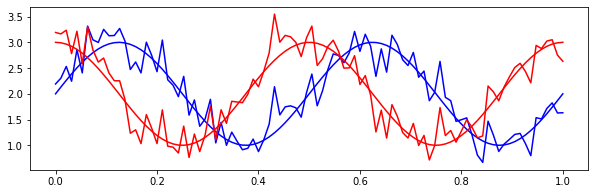

In [2]:
t = np.linspace(0,1,96)
noise = np.random.normal(0, 0.3, len(t))
x1 = np.sin(4*np.pi*t) + 2
x2 = x1 + noise
x3 = np.cos(4*np.pi*t) + 2
x4 = x3 + noise
plt.figure(figsize=(10,3))
plt.plot(t,x1, color='blue')
plt.plot(t,x2, color='blue')
plt.plot(t,x3, color='red')
plt.plot(t,x4, color='red')
plt.show()

In [3]:
X = pd.DataFrame(np.ones((96,4)))
X.iloc[:,0]=x1
X.iloc[:,1]=x2
X.iloc[:,2]=x3
X.iloc[:,3]=x4

In [4]:
X = X.rename(columns={0:'node1', 1:'node2', 2:'node3', 3:'node4'})

In [5]:
X.head()

,node1,node2,node3,node4
0,2.000000,2.191496,3.000000,3.191496
1,2.131892,2.304474,2.991264,3.163845
2,2.261480,2.531197,2.965209,3.234926
3,2.386499,2.244653,2.922290,2.780443
4,2.504766,2.856344,2.863256,3.214835


In [6]:
cor1 = round(X.corr(),4)

In [7]:
cor1

,node1,node2,node3,node4
node1,1.0000,0.9295,0.0000,-0.0300
node2,0.9295,1.0000,0.0137,0.1141
node3,0.0000,0.0137,1.0000,0.9361
node4,-0.0300,0.1141,0.9361,1.0000


In [8]:
cor2 = pd.DataFrame({'node1':[1.0000,0.1238,0.9172,-0.0250], 'node2':[0.1238, 1.0000, -0.0087, 0.9172], 'node3':[0.9172,-0.0087, 1.0000, 0.0000], 'node4':[-0.0250,0.9172,0.0000,1.0000]})
cor2

,node1,node2,node3,node4
0,1.0000,0.1238,0.9172,-0.0250
1,0.1238,1.0000,-0.0087,0.9172
2,0.9172,-0.0087,1.0000,0.0000
3,-0.0250,0.9172,0.0000,1.0000


<Axes: >

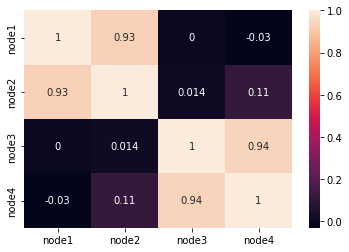

In [9]:
sns.heatmap(cor1, annot=True)

<Axes: >

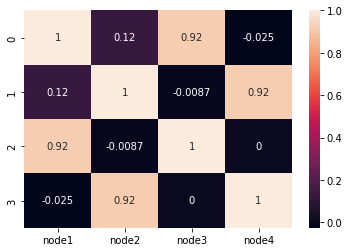

In [10]:
sns.heatmap(cor2, annot=True)

In [11]:
edges = []

for i in range(4):
    for j in range(4):
        #if i != j:
            edges.append([i,j])
print(edges)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]


- Winmilldataset 뜯어보니 일단 다 연결은 해놓은 듯 하다(length: 노드x노드)
- Windmill에서는 자기자신과 연결해놨음. -> 자기자신과의 가중치 1로줬음
- 혹시모르니까 두 개 다 만들어보자..

## Create Dataset

### `-` 자기자신과 연결X (가중0)

In [12]:
FX = []    
for i in range(96):
    FX.append(list(X.iloc[i,:])) 
#FX

In [13]:
weights = []

for i in range(4):
    for j in range(4):
        if i != j:
            weights.append(cor1.iloc[i,j])
        else:
            weights.append(0)

In [14]:
weights2 = []

for i in range(4):
    for j in range(4):
        if i != j:
            weights2.append(cor2.iloc[i,j])
        else:
            weights2.append(0)

In [15]:
len(edges), len(weights)

(16, 16)

In [16]:
node_list = (X.columns).tolist()
node_ids = {node : i for i, node in enumerate(node_list)}
node_ids

{'node1': 0, 'node2': 1, 'node3': 2, 'node4': 3}

In [17]:
data_dict = {'edges':edges, 'node_ids':node_ids, 'weights':weights, 'FX': FX}

In [18]:
data_dict2 = data_dict.copy()

In [19]:
data_dict2['weights'] = weights2

In [20]:
import json
import urllib

In [213]:
# file_path = './toy_example/data/normal.json'
# with open(file_path, 'w') as f:
#     json.dump(data_dict, f)

In [214]:
# with open('./toy_example/data/abnormal.json', 'w') as f:
#     json.dump(data_dict2, f)

### 자기자신과 연결(가중1)

In [21]:
weights_ = []

for i in range(4):
    for j in range(4):
            weights_.append(cor1.iloc[i,j])

In [25]:
weights_2 = []

for i in range(4):
    for j in range(4):
        weights_2.append(cor2.iloc[i,j])

In [30]:
data_dict_ = {'edges':edges, 'node_ids':node_ids, 'weights':weights_, 'FX': FX}

In [31]:
data_dict2_ = data_dict_.copy()
data_dict2_['weights'] = weights_2

In [36]:
len(data_dict_['weights']), len(data_dict2_['weights'])

(16, 16)

In [38]:
# with open('./toy_example/data/self_loop/normal.json', 'w') as f:
#     json.dump(data_dict_, f)

In [39]:
# with open('./toy_example/data/self_loop/abnormal.json', 'w') as f:
#     json.dump(data_dict2_, f)

## LRNR

In [40]:
import eptstgcn
import torch
import pandas as pd
import numpy as np
import gc